In [1]:
import cv2
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
import matplotlib.pyplot as plt
from glob import glob

/home/ubuntu/anaconda3/envs/nipa2022/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pose_config = 'configs/custom/hrformer_base_coco_384x384.py'
pose_checkpoint = 'work_dirs/hrformer_base_coco_384x384/latest.pth'

In [3]:
pose_model = init_pose_model(pose_config, pose_checkpoint)

load checkpoint from local path: work_dirs/hrformer_base_coco_384x384/latest.pth


In [4]:
def infer(img_path):
    pose_results, returned_outputs = inference_top_down_pose_model(
        pose_model,
        img_path,
        format='xyxy',
        dataset='MyCustomDataset')
    vis_result = vis_pose_result(
        pose_model,
        img_path,
        pose_results,
        radius=5,
        thickness=2,
        kpt_score_thr=0.,
        dataset='MyCustomDataset',
        show=False)

    plt.figure(figsize=(10,10))
    plt.imshow(vis_result[:,:,::-1])
    plt.show()

In [5]:
img_files = glob('../data/sample/image/*')

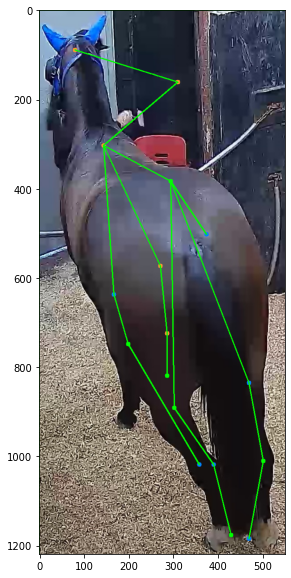

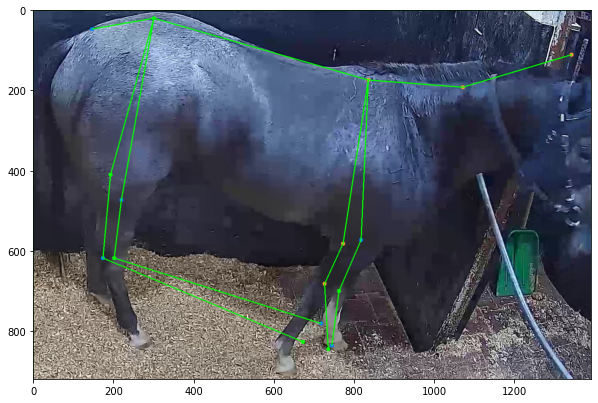

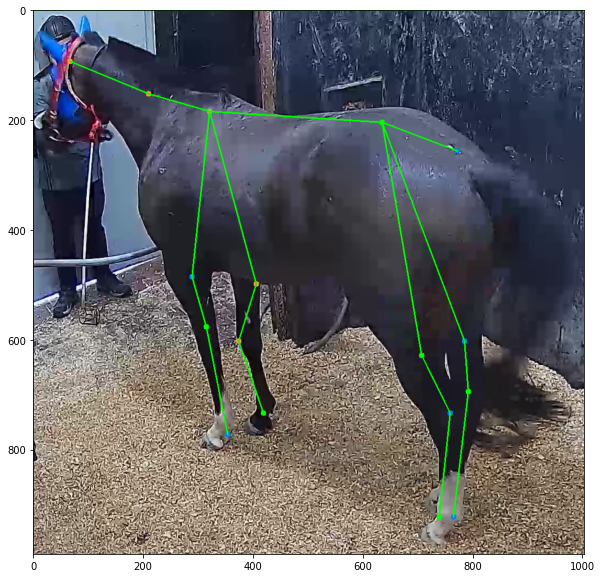

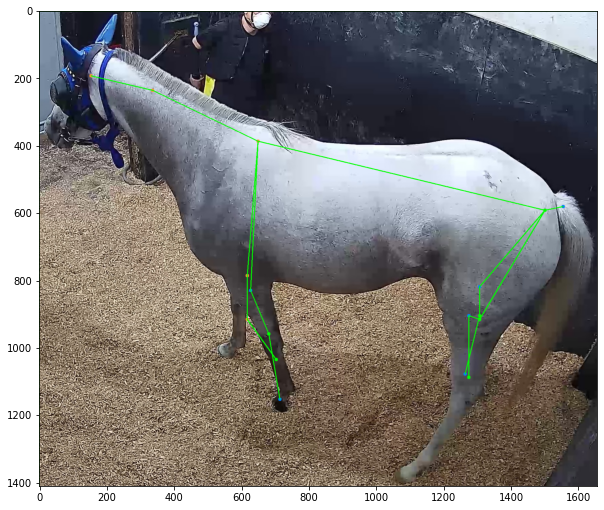

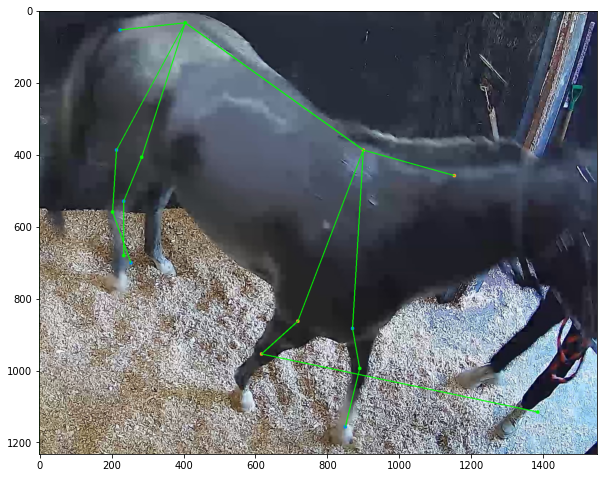

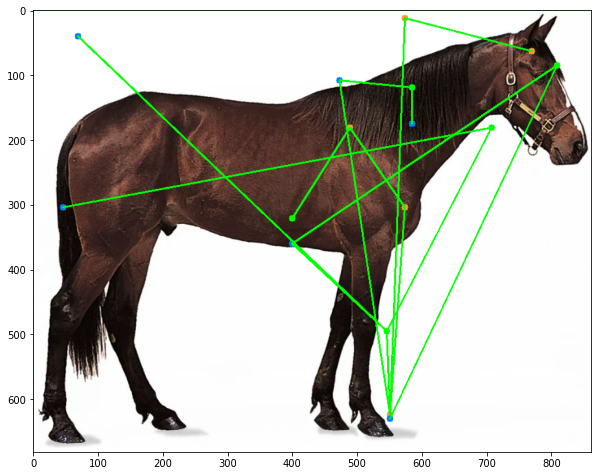

In [6]:
for img_path in img_files:
    infer(img_path)